In [1]:
import numpy as np
#numpy is basic library, check data type, basic stat and math
import pandas as pd
#pandas is for dataframe

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import scale, robust_scale

In [4]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=14
fig_size[1]=8
plt.rcParams["figure.figsize"]=fig_size


In [ ]:
zuhaili_data=pd.read_excel(r"C:\Users\Zuhaili\Desktop\NewCleanData.xlsx")
#pd can create dataframe
zuhaili_data.head()

In [9]:
zuhaili_data.head()
#review data

,iyear,imonth,country_txt,region,region_txt,latitude,longitude,success,suicide,attacktype1,...,attacktypeclass_txt,targtype1,targtype1_txt,targettypeclass,targettypeclass_txt,natlty1_txt,weaptype1,weaptype1_txt,weapontypeclass,weapontypeclass_txt
0,1970,3,United States,1,North America,33.836510,-86.254749,1,0,8,...,Easy,15,Private Citizens & Property,3,Important,United States,8,Chemical,4,Bio and chem weapon
1,1970,6,United States,1,North America,40.697132,-73.931351,1,0,8,...,Easy,11,Business,3,Important,United States,8,Chemical,4,Bio and chem weapon
2,1970,10,Italy,8,Western Europe,41.890961,12.490069,0,0,1,...,Difficult,9,Educational Institution,3,Important,United States,8,Chemical,4,Bio and chem weapon
3,1970,7,United States,1,North America,38.627740,-90.199514,1,0,4,...,Less difficult,11,Business,3,Important,United States,6,Explosives,3,Military weapon
4,1970,6,United States,1,North America,41.524935,-88.084594,0,0,4,...,Less difficult,15,Private Citizens & Property,3,Important,United States,6,Explosives,3,Military weapon


Text(0.5, 1.0, 'Elbow curve')

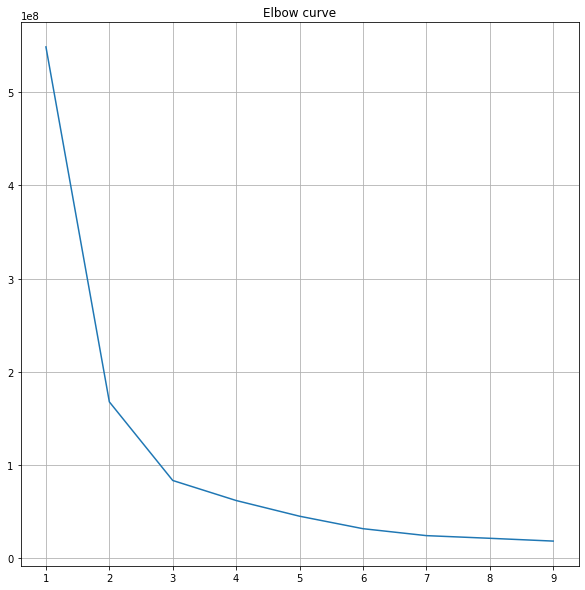

In [13]:
#For Class
dfclass = zuhaili_data.drop(['iyear','imonth','country_txt','region_txt','suicide',
'attacktype1','attacktype1_txt','targtype1','targtype1_txt','natlty1_txt',
'weaptype1','weaptype1_txt',
'attacktypeclass_txt','targettypeclass_txt','weapontypeclass_txt'], axis=1)
#region, target ,attack , weapon, success variable
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(dfclass)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(10, 10))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'Elbow curve')

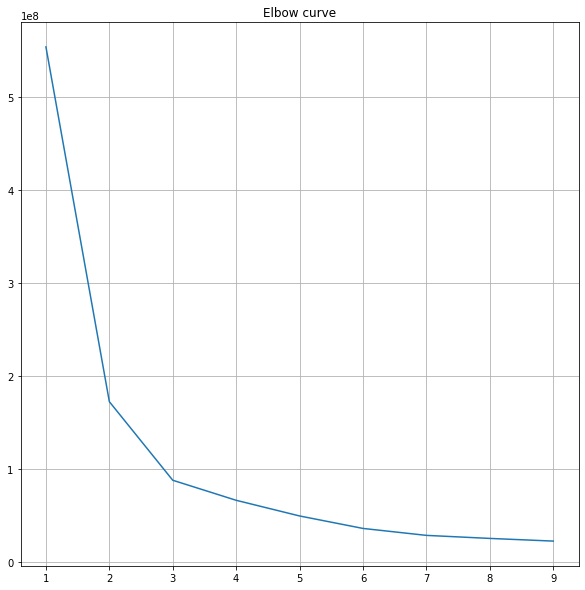

In [15]:
#Rate
dfrate = zuhaili_data.drop(['iyear','imonth','country_txt','region_txt','suicide',
'attacktype1_txt','targtype1_txt','natlty1_txt','weaptype1_txt',
'attacktypeclass_txt','targettypeclass_txt','weapontypeclass_txt',
'attacktypeclass','targettypeclass','weapontypeclass'], axis=1)
#region, target ,attack , weapon, success variable
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(dfrate)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(10, 10))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [18]:
#To modify data
#For class
featuresX = ['longitude','latitude','attacktypeclass_txt','weapontypeclass_txt','targettypeclass_txt']

X = pd.get_dummies(zuhaili_data[featuresX])
X = X.T[X.var() > 0.05].T.fillna(0)
X = X.fillna(0)

print('Shape:', X.shape)

X.head()

Shape: (145023, 10)


,longitude,latitude,attacktypeclass_txt_Easy,attacktypeclass_txt_Less difficult,attacktypeclass_txt_Medium,weapontypeclass_txt_Melee,weapontypeclass_txt_Military weapon,targettypeclass_txt_Important,targettypeclass_txt_Slightly important,targettypeclass_txt_Very important
0,-86.254749,33.836510,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-73.931351,40.697132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.490069,41.890961,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-90.199514,38.627740,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-88.084594,41.524935,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [20]:
#To modify data
#For rate
featuresY = ['longitude','latitude','attacktype1_txt','weaptype1_txt','targtype1_txt']

Y = pd.get_dummies(zuhaili_data[featuresY])
Y = Y.T[Y.var() > 0.05].T.fillna(0)
Y = Y.fillna(0)

print('Shape:', Y.shape)
Y.head()

Shape: (145023, 14)


,longitude,latitude,attacktype1_txt_Armed Assault,attacktype1_txt_Assassination,attacktype1_txt_Bombing/Explosion,attacktype1_txt_Facility/Infrastructure Attack,weaptype1_txt_Explosives,weaptype1_txt_Firearms,weaptype1_txt_Incendiary,targtype1_txt_Business,targtype1_txt_Government (General),targtype1_txt_Military,targtype1_txt_Police,targtype1_txt_Private Citizens & Property
0,-86.254749,33.836510,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-73.931351,40.697132,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,12.490069,41.890961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-90.199514,38.627740,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-88.084594,41.524935,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
#For Class
zuhaili_data['Cluster'] = KMeans(n_clusters= 3 ).fit_predict(X) + 1
print('Silhouette Score:', silhouette_score(X, zuhaili_data['Cluster'], sample_size=10000)*10000// 1 / 100, '%')
zuhaili_data['Cluster'] = KMeans(n_clusters= 4 ).fit_predict(X) + 1
print('Silhouette Score:', silhouette_score(X, zuhaili_data['Cluster'], sample_size=10000)*10000// 1 / 100, '%')
zuhaili_data['Cluster'] = KMeans(n_clusters= 5 ).fit_predict(X) + 1
print('Silhouette Score:', silhouette_score(X, zuhaili_data['Cluster'], sample_size=10000)*10000// 1 / 100, '%')
zuhaili_data['Cluster'] = KMeans(n_clusters= 6 ).fit_predict(X) + 1
print('Silhouette Score:', silhouette_score(X, zuhaili_data['Cluster'], sample_size=10000)*10000// 1 / 100, '%')
zuhaili_data['Cluster'] = KMeans(n_clusters= 7 ).fit_predict(X) + 1
print('Silhouette Score:', silhouette_score(X, zuhaili_data['Cluster'], sample_size=10000)*10000// 1 / 100, '%')

Silhouette Score: 55.81 %
Silhouette Score: 51.62 %
Silhouette Score: 56.22 %
Silhouette Score: 62.22 %
Silhouette Score: 58.29 %


In [25]:
#For rating
zuhaili_data['Cluster'] = KMeans(n_clusters= 3 ).fit_predict(Y) + 1
print('Silhouette Score:', silhouette_score(X, zuhaili_data['Cluster'], sample_size=10000)*10000// 1 / 100, '%')
zuhaili_data['Cluster'] = KMeans(n_clusters= 4 ).fit_predict(Y) + 1
print('Silhouette Score:', silhouette_score(X, zuhaili_data['Cluster'], sample_size=10000)*10000// 1 / 100, '%')
zuhaili_data['Cluster'] = KMeans(n_clusters= 5 ).fit_predict(Y) + 1
print('Silhouette Score:', silhouette_score(X, zuhaili_data['Cluster'], sample_size=10000)*10000// 1 / 100, '%')
zuhaili_data['Cluster'] = KMeans(n_clusters= 6 ).fit_predict(Y) + 1
print('Silhouette Score:', silhouette_score(X, zuhaili_data['Cluster'], sample_size=10000)*10000// 1 / 100, '%')
zuhaili_data['Cluster'] = KMeans(n_clusters= 7 ).fit_predict(Y) + 1
print('Silhouette Score:', silhouette_score(X, zuhaili_data['Cluster'], sample_size=10000)*10000// 1 / 100, '%')

Silhouette Score: 55.88 %
Silhouette Score: 50.51 %
Silhouette Score: 55.76 %
Silhouette Score: 61.56 %
Silhouette Score: 58.59 %


In [27]:
# Create a column with cluster for all data
zuhaili_data['ClusterX'] = KMeans(n_clusters=6).fit_predict(X)
zuhaili_data['ClusterY'] = KMeans(n_clusters=6).fit_predict(Y)

In [29]:
# Modify data -> Add one column with cluster name corresponds to cluster
# For class
names = zuhaili_data.groupby('ClusterX')['region_txt'].describe()['top'].values
zuhaili_data['ClusterNameX'] = zuhaili_data['ClusterX'].apply(lambda c: names[c - 1])
numerical = zuhaili_data.dtypes[zuhaili_data.dtypes != 'object'].keys()
exclude = ['iyear', 'imonth'] + [col for col in numerical if 'type' in col or 'mode' in col or 'ransom' in col]

X_profiling = zuhaili_data[numerical.drop(exclude)].fillna(0)
X_profiling = pd.DataFrame(scale(X_profiling), columns=X_profiling.columns)
X_profiling['ClusterNameX'] = zuhaili_data['ClusterNameX']
# _ = sns.heatmap(X_profiling.groupby('ClusterName').mean().drop(['longitude', 'latitude'], axis=1).T, cmap='coolwarm')

In [32]:
# Modify data -> Add one column with cluster name corresponds to cluster
# For rate
names = zuhaili_data.groupby('ClusterY')['region_txt'].describe()['top'].values
zuhaili_data['ClusterNameY'] = zuhaili_data['ClusterY'].apply(lambda c: names[c - 1])
numerical = zuhaili_data.dtypes[zuhaili_data.dtypes != 'object'].keys()
exclude = ['iyear', 'imonth'] + [col for col in numerical if 'type' in col or 'mode' in col or 'ransom' in col]
Y_profiling = zuhaili_data[numerical.drop(exclude)].fillna(0)
Y_profiling = pd.DataFrame(scale(Y_profiling), columns=Y_profiling.columns)
Y_profiling['ClusterNameY'] = zuhaili_data['ClusterNameY']

In [34]:
# Remove error
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [36]:
zuhaili_data.head()

,iyear,imonth,country_txt,region,region_txt,latitude,longitude,success,suicide,attacktype1,...,natlty1_txt,weaptype1,weaptype1_txt,weapontypeclass,weapontypeclass_txt,Cluster,ClusterX,ClusterY,ClusterNameX,ClusterNameY
0,1970,3,United States,1,North America,33.836510,-86.254749,1,0,8,...,United States,8,Chemical,4,Bio and chem weapon,2,1,2,Sub-Saharan Africa,Southeast Asia
1,1970,6,United States,1,North America,40.697132,-73.931351,1,0,8,...,United States,8,Chemical,4,Bio and chem weapon,2,1,2,Sub-Saharan Africa,Southeast Asia
2,1970,10,Italy,8,Western Europe,41.890961,12.490069,0,0,1,...,United States,8,Chemical,4,Bio and chem weapon,6,5,0,South Asia,South Asia
3,1970,7,United States,1,North America,38.627740,-90.199514,1,0,4,...,United States,6,Explosives,3,Military weapon,2,1,2,Sub-Saharan Africa,Southeast Asia
4,1970,6,United States,1,North America,41.524935,-88.084594,0,0,4,...,United States,6,Explosives,3,Military weapon,2,1,2,Sub-Saharan Africa,Southeast Asia


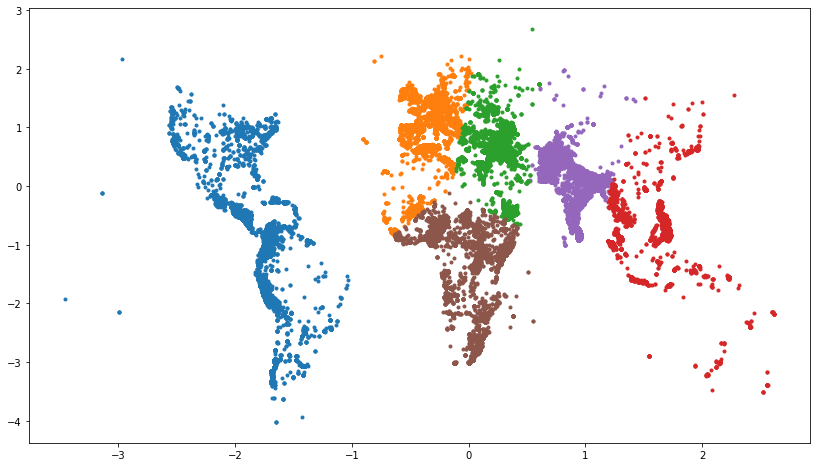

In [38]:
#Graph for class data
ckeys = zuhaili_data['ClusterNameX'].unique()
ckeys = dict(zip(ckeys, plt.cm.tab10(range(len(ckeys)))))
for i, x in X_profiling.groupby('ClusterNameX'): _=plt.scatter(x['longitude'], x['latitude'], c=ckeys[i],marker='.', cmap='tab10', label=i)
#_=plt.legend(loc=3)

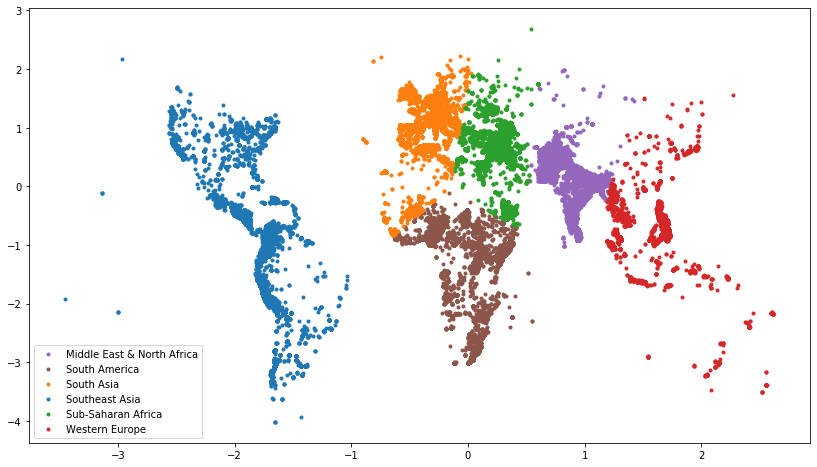

In [40]:
# Graph for rating data
ckeys1 = zuhaili_data['ClusterNameY'].unique()
ckeys1 = dict(zip(ckeys1, plt.cm.tab10(range(len(ckeys1)))))
for i, x in Y_profiling.groupby('ClusterNameY'): _=plt.scatter(x['longitude'], x['latitude'], c=ckeys1[i],marker='.', cmap='tab10', label=i)
_=plt.legend(loc=3)

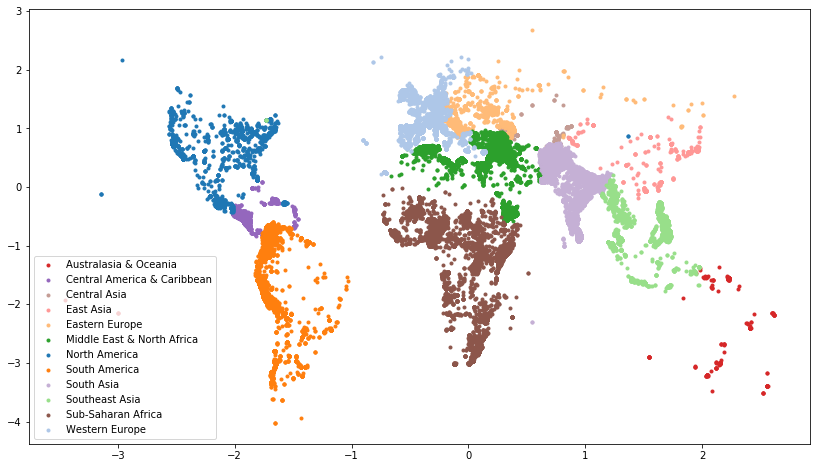

In [44]:
# Graph for original data
ckeys = zuhaili_data['region_txt'].unique()
ckeys = dict(zip(ckeys, plt.cm.tab20(range(len(ckeys)))))
c=[1]

for i, x in pd.concat([X_profiling, zuhaili_data['region_txt']], axis=1).groupby('region_txt'):
    _ = plt.scatter(x['longitude'], x['latitude'], c=ckeys[i], marker='.', cmap='tab10', label=i)
_ = plt.legend(loc=3)

In [46]:
#Size of cluster for class
pd.value_counts(zuhaili_data['ClusterX'].values)

3    42841
4    34670
1    26944
5    17818
0    12465
2    10285
dtype: int64

In [48]:
#For class
cx1=(zuhaili_data[zuhaili_data['ClusterX']==0])
cx2=(zuhaili_data[zuhaili_data['ClusterX']==1])
cx3=(zuhaili_data[zuhaili_data['ClusterX']==2])
cx4=(zuhaili_data[zuhaili_data['ClusterX']==3])
cx5=(zuhaili_data[zuhaili_data['ClusterX']==4])
cx6=(zuhaili_data[zuhaili_data['ClusterX']==5])

In [50]:
#For rating
cy1=(zuhaili_data[zuhaili_data['ClusterY']==0])
cy2=(zuhaili_data[zuhaili_data['ClusterY']==1])
cy3=(zuhaili_data[zuhaili_data['ClusterY']==2])
cy4=(zuhaili_data[zuhaili_data['ClusterY']==3])
cy5=(zuhaili_data[zuhaili_data['ClusterY']==4])
cy6=(zuhaili_data[zuhaili_data['ClusterY']==5])

In [52]:
zuhaili_data['attacktypeclass_txt'].unique()

array(['Easy', 'Difficult', 'Less difficult', 'Medium'], dtype=object)

Text(0.5, 1.0, 'Attack type')

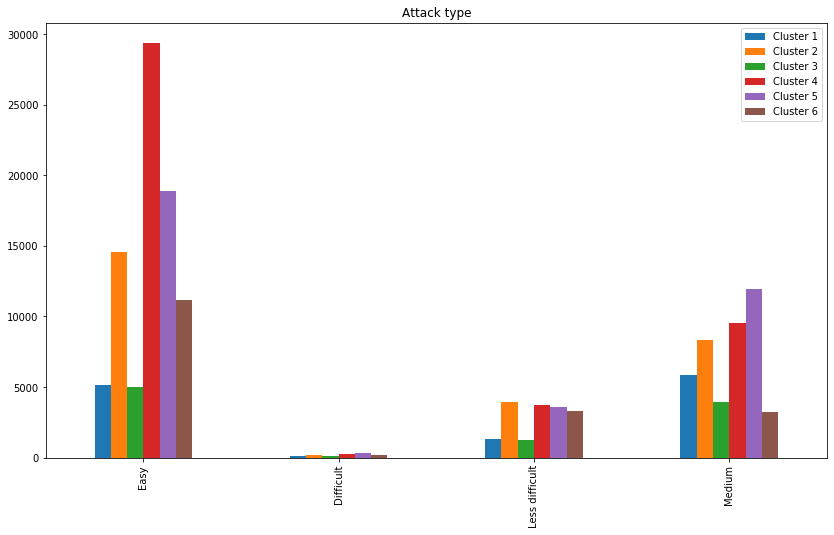

In [54]:
#For class
atc1=pd.value_counts(cx1['attacktypeclass_txt'].values)
atc2=pd.value_counts(cx2['attacktypeclass_txt'].values)
atc3=pd.value_counts(cx3['attacktypeclass_txt'].values)
atc4=pd.value_counts(cx4['attacktypeclass_txt'].values)
atc5=pd.value_counts(cx5['attacktypeclass_txt'].values)
atc6=pd.value_counts(cx6['attacktypeclass_txt'].values)
index1=['Easy', 'Difficult', 'Less difficult', 'Medium']
bar1 = pd.DataFrame({'Cluster 1': atc1,'Cluster 2': atc2,'Cluster 3': atc3,'Cluster 4': atc4,'Cluster 5': atc5,'Cluster 6': atc6}, index=index1)
bar1.plot.bar()
plt.title("Attack type")

In [56]:
zuhaili_data['attacktype1_txt'].unique()

array(['Facility/Infrastructure Attack', 'Unarmed Assault',
       'Assassination', 'Bombing/Explosion', 'Hijacking', 'Armed Assault',
       'Hostage Taking (Barricade Incident)',
       'Hostage Taking (Kidnapping)'], dtype=object)

Text(0.5, 1.0, 'Attack type')

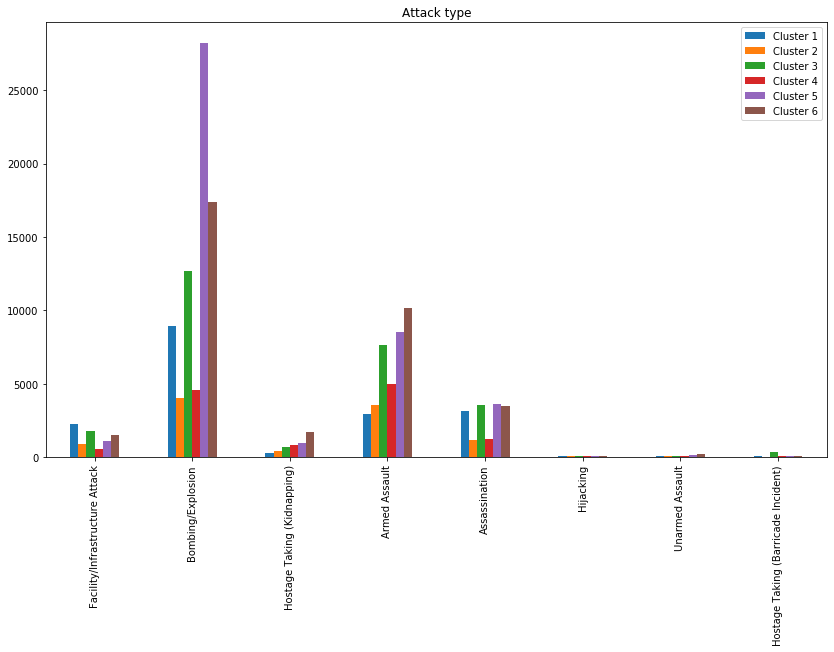

In [58]:
#For rating
atcy1=pd.value_counts(cy1['attacktype1_txt'].values)
atcy2=pd.value_counts(cy2['attacktype1_txt'].values)
atcy3=pd.value_counts(cy3['attacktype1_txt'].values)
atcy4=pd.value_counts(cy4['attacktype1_txt'].values)
atcy5=pd.value_counts(cy5['attacktype1_txt'].values)
atcy6=pd.value_counts(cy6['attacktype1_txt'].values)
indexy1=['Facility/Infrastructure Attack', 'Bombing/Explosion',
'Hostage Taking (Kidnapping)', 'Armed Assault', 'Assassination',
'Hijacking', 'Unarmed Assault',
'Hostage Taking (Barricade Incident)']
bary1 = pd.DataFrame({'Cluster 1': atcy1,'Cluster 2': atcy2,'Cluster 3': atcy3,'Cluster 4': atcy4,'Cluster 5': atcy5,'Cluster 6': atcy6}, index=indexy1)
bary1.plot.bar()
plt.title("Attack type")

In [60]:
zuhaili_data['targettypeclass_txt'].unique()

array(['Important', 'Very important', 'Slightly important',
       'Not important'], dtype=object)

Text(0.5, 1.0, 'Target type')

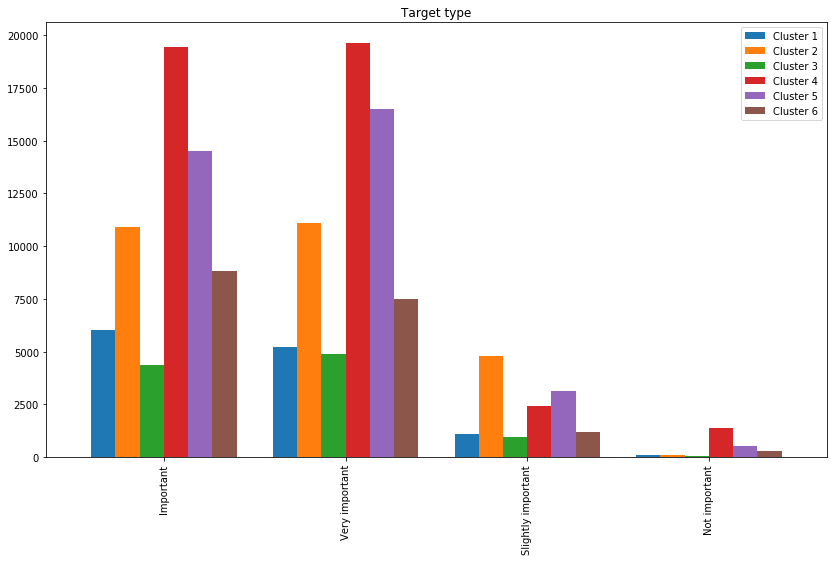

In [62]:
#For class
ttc1=pd.value_counts(cx1['targettypeclass_txt'].values)
ttc2=pd.value_counts(cx2['targettypeclass_txt'].values)
ttc3=pd.value_counts(cx3['targettypeclass_txt'].values)
ttc4=pd.value_counts(cx4['targettypeclass_txt'].values)
ttc5=pd.value_counts(cx5['targettypeclass_txt'].values)
ttc6=pd.value_counts(cx6['targettypeclass_txt'].values)
index2=['Important', 'Very important', 'Slightly important','Not important' ]
bar2 = pd.DataFrame({'Cluster 1': ttc1,'Cluster 2': ttc2,'Cluster 3': ttc3,'Cluster 4': ttc4,'Cluster 5': ttc5,'Cluster 6': ttc6}, index=index2)
bar2.plot.bar(width=0.8)
plt.title("Target type")

In [64]:
zuhaili_data['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Business',
       'Educational Institution', 'Government (General)', 'Military',
       'Police', 'Religious Figures/Institutions', 'Utilities',
       'Transportation', 'Journalists & Media', 'Telecommunication',
       'Food or Water Supply', 'Government (Diplomatic)', 'NGO',
       'Terrorists/Non-State Militia', 'Airports & Aircraft', 'Tourists',
       'Violent Political Party', 'Maritime', 'Abortion Related'],
      dtype=object)

Text(0.5, 1.0, 'Target type')

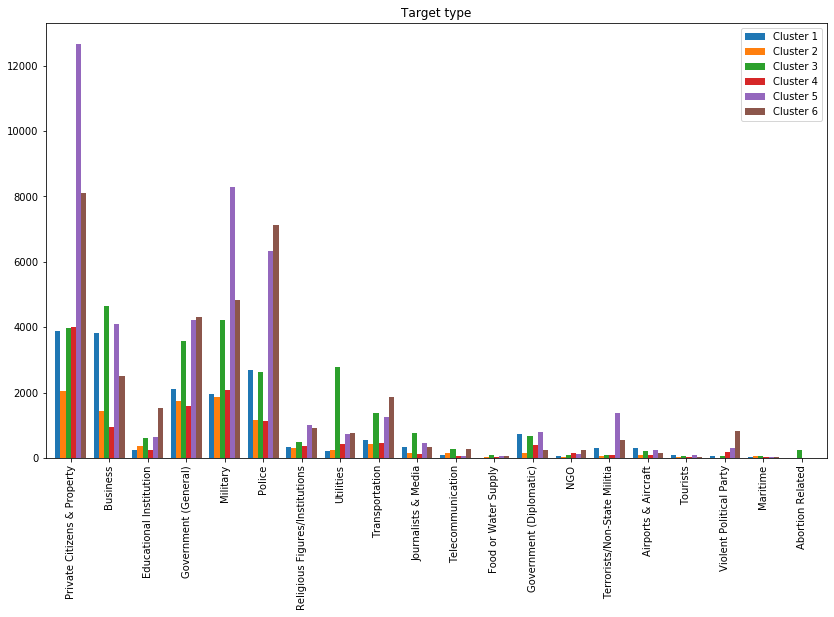

In [66]:
#rating
ttcy1=pd.value_counts(cy1['targtype1_txt'].values)
ttcy2=pd.value_counts(cy2['targtype1_txt'].values)
ttcy3=pd.value_counts(cy3['targtype1_txt'].values)
ttcy4=pd.value_counts(cy4['targtype1_txt'].values)
ttcy5=pd.value_counts(cy5['targtype1_txt'].values)
ttcy6=pd.value_counts(cy6['targtype1_txt'].values)
indexy2=['Private Citizens & Property', 'Business',
'Educational Institution', 'Government (General)', 'Military',
'Police', 'Religious Figures/Institutions', 'Utilities',
'Transportation', 'Journalists & Media', 'Telecommunication',
'Food or Water Supply', 'Government (Diplomatic)', 'NGO',
'Terrorists/Non-State Militia', 'Airports & Aircraft', 'Tourists',
'Violent Political Party', 'Maritime', 'Abortion Related']
bar2 = pd.DataFrame({'Cluster 1': ttcy1,'Cluster 2': ttcy2,'Cluster 3': ttcy3,'Cluster 4': ttcy4,'Cluster 5': ttcy5,'Cluster 6': ttcy6}, index=indexy2)
bar2.plot.bar(width=0.8)
plt.title("Target type")

In [68]:
zuhaili_data['weapontypeclass_txt'].unique()

array(['Bio and chem weapon', 'Military weapon', 'Melee',
       'Vehicle (not to include vehicle-borne explosives', 'Fake Weapons',
       'Radiological'], dtype=object)

Text(0.5, 1.0, 'Weapon type')

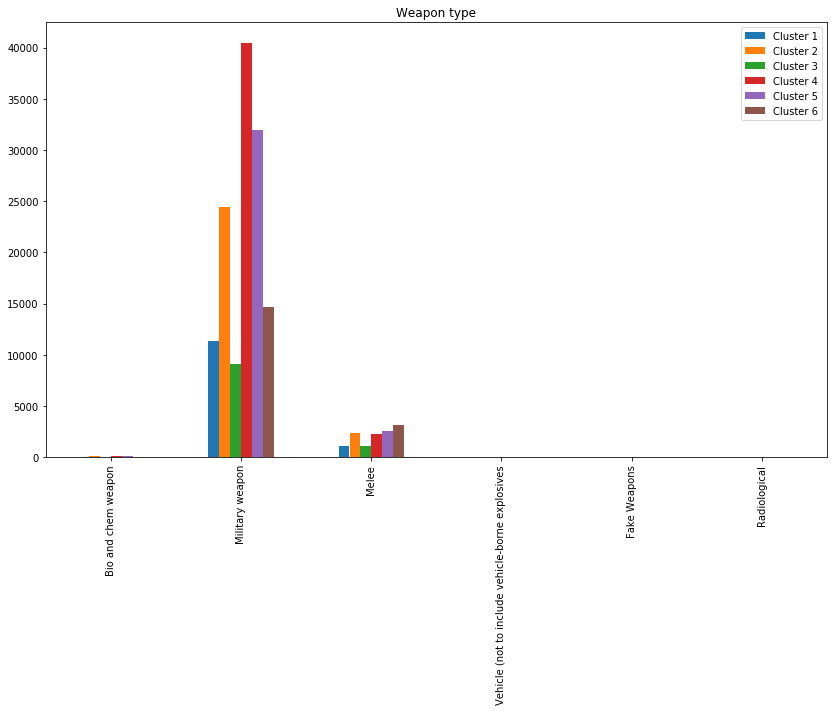

In [70]:
wtc1=pd.value_counts(cx1['weapontypeclass_txt'].values)
wtc2=pd.value_counts(cx2['weapontypeclass_txt'].values)
wtc3=pd.value_counts(cx3['weapontypeclass_txt'].values)
wtc4=pd.value_counts(cx4['weapontypeclass_txt'].values)
wtc5=pd.value_counts(cx5['weapontypeclass_txt'].values)
wtc6=pd.value_counts(cx6['weapontypeclass_txt'].values)
index3=['Bio and chem weapon', 'Military weapon', 'Melee',
'Vehicle (not to include vehicle-borne explosives', 'Fake Weapons',
'Radiological']
bar3 = pd.DataFrame({'Cluster 1': wtc1,'Cluster 2': wtc2,'Cluster 3': wtc3,'Cluster 4': wtc4,'Cluster 5': wtc5,'Cluster 6': wtc6}, index=index3)
bar3.plot.bar()
plt.title("Weapon type")

In [72]:
zuhaili_data['weaptype1_txt'].unique()

array(['Chemical', 'Explosives', 'Firearms', 'Incendiary', 'Melee',
       'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives', 'Fake Weapons',
       'Radiological', 'Biological'], dtype=object)

Text(0.5, 1.0, 'Weapon type')

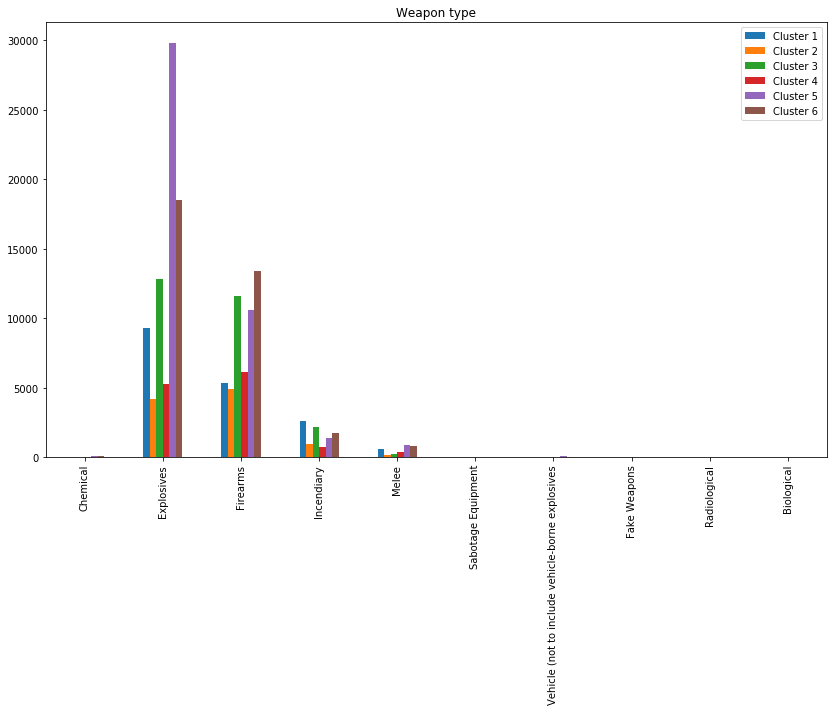

In [73]:
wtcy1=pd.value_counts(cy1['weaptype1_txt'].values)
wtcy2=pd.value_counts(cy2['weaptype1_txt'].values)
wtcy3=pd.value_counts(cy3['weaptype1_txt'].values)
wtcy4=pd.value_counts(cy4['weaptype1_txt'].values)
wtcy5=pd.value_counts(cy5['weaptype1_txt'].values)
wtcy6=pd.value_counts(cy6['weaptype1_txt'].values)
indexy3=['Chemical', 'Explosives', 'Firearms', 'Incendiary', 'Melee',
'Sabotage Equipment',
'Vehicle (not to include vehicle-borne explosives', 'Fake Weapons',
'Radiological', 'Biological']
bar3 = pd.DataFrame({'Cluster 1': wtcy1,'Cluster 2': wtcy2,'Cluster 3': wtcy3,'Cluster 4': wtcy4,'Cluster 5': wtcy5,'Cluster 6': wtcy6}, index=indexy3)
bar3.plot.bar()
plt.title("Weapon type")